In [2]:
excel_file_path = r"C:\Users\HP\Desktop\DATASCI\PERSONALProjects\KPMG virtual internship\KPMG_VI_new_raw_data.xlsx"
sheet_names = ['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAdress']

In [3]:
import pandas as pd
import os

def excel_to_csv(excel_file_path, sheet_names=None, csv_file_names=None):
    excel_file_path = os.path.abspath(excel_file_path)  # Convert to absolute path
    xls = pd.ExcelFile(excel_file_path)

    if csv_file_names is None:
        csv_file_names = [sheet_name for sheet_name in xlsx.sheet_names]

    if len(csv_file_names) != len(xls.sheet_names):
        raise ValueError("Number of CSV file names must match the number of sheets in the Excel file.")

    for sheet_name, csv_name in zip(xls.sheet_names, csv_file_names):
        df = xls.parse(sheet_name)
        csv_file_path = f'{csv_name}.csv'  # Save each sheet with the provided CSV file name
        df.to_csv(csv_file_path, index=False)

    print("Conversion completed!")

# Call the function to convert the Excel file to CSV with custom names for each sheet
#excel_file_path = 'C:/Users/HP/Desktop/DATASCI/PERSONAL/KPMG virtual internship/kpmg_sprocket.xlsx'
sheet_names = None  # Set this to a list of specific sheet names if you want to convert only certain sheets.
csv_file_names = ['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']  # Provide the desired CSV file names

excel_to_csv(excel_file_path, sheet_names, csv_file_names)



C:\Users\HP\AppData\Local\Temp\ipykernel_24060\509358284.py:15: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = xls.parse(sheet_name)
C:\Users\HP\AppData\Local\Temp\ipykernel_24060\509358284.py:15: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = xls.parse(sheet_name)


Conversion completed!


In [4]:
#Now to turn the respective sheets to dataframes
transactions_df = pd.read_csv("Transactions.csv")
transactions_df.head()
#CustomerList_df = pd.read_csv('NewCustomerList.csv')
#CustomerList_df.head()
CustomerDemographic_df = pd.read_csv("CustomerDemographic.csv")
#CustomerDemographic_df.head()
CustomerAddress_df = pd.read_csv("CustomerAddress.csv")
#CustomerAddress_df.head()

In [5]:
## In this task, we do not the customerlist df.
#The rest of the sheets have a column in common, Customerid, so we will try to join them using this feature
# Merge the dataframes one by one using customer_id as the key
merged_df = pd.merge(transactions_df, CustomerDemographic_df, on='customer_id', how='outer')
merged_df = pd.merge(merged_df, CustomerAddress_df, on='customer_id', how='outer')

# If you want to perform an inner join (intersection) use 'inner' in the how argument.
# If you want to perform an outer join (union), use 'outer' in the how argument.

#print(merged_df.head())

In [6]:
#merged_df.head()
#let's see the all the columns
#merged_df.columns

In [7]:
CustomerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
#let's get the age distribution of these potential customers
from datetime import datetime

# Convert the DOB column to datetime
CustomerDemographic_df['DOB'] = pd.to_datetime(CustomerDemographic_df['DOB'])

# Calculate age based on the current date
current_date = datetime.now()
CustomerDemographic_df['Age'] = (current_date - CustomerDemographic_df['DOB']).astype('<m8[Y]')  # Calculate age in years

# Display the DataFrame with the Age column
CustomerDemographic_df.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,69.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,62.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,46.0


In [9]:
oldest_age = CustomerDemographic_df['Age'].max()
youngest_age = CustomerDemographic_df['Age'].min()

print("Oldest person's age:", oldest_age)
print("Youngest person's age:", youngest_age)



Oldest person's age: 179.0
Youngest person's age: 21.0


Oop! There's someone who's 179 years old, that can't be, let's take care of that.

In [10]:
# Convert the "DOB" column to datetime
CustomerDemographic_df['DOB'] = pd.to_datetime(CustomerDemographic_df['DOB'])

# Find the oldest date of birth
oldest_dob = CustomerDemographic_df['DOB'].min()
CustomerDemographic_df = CustomerDemographic_df.drop(CustomerDemographic_df[CustomerDemographic_df['DOB'] == oldest_dob].index)


In [11]:
oldest_age = CustomerDemographic_df['Age'].max()
youngest_age = CustomerDemographic_df['Age'].min()

print("Oldest person's age:", oldest_age)
print("Youngest person's age:", youngest_age)

Oldest person's age: 91.0
Youngest person's age: 21.0


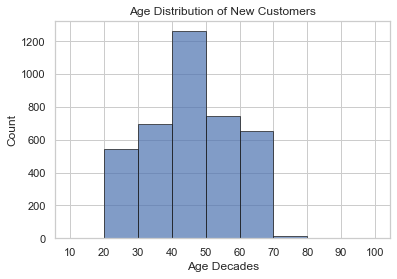

In [12]:
# Let's check out the age distribution visually
import matplotlib.pyplot as plt

# Define the bin edges for decades
bin_edges = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a histogram by binning the ages into decades
plt.hist(CustomerDemographic_df['Age'], bins=bin_edges, edgecolor='k', alpha=0.7)
plt.xlabel('Age Decades')
plt.ylabel('Count')
plt.title('Age Distribution of New Customers')
plt.xticks(bin_edges)

# Show the plot
plt.show()


New customers are more from the age group of 40-50 , followed by 50-60 & 60-70. Probably because they are more health-conscious and want to keep fit, with more time in their hands. 

Fewer customer are from 10-19 & 90-99 for obvious reasons.


In [13]:
gen = CustomerDemographic_df["gender"].value_counts()
print(gen)
#print(CustomerDemographic_df.gender)

Female    2037
Male      1872
U           87
F            1
Femal        1
M            1
Name: gender, dtype: int64


There's some inconsistencies with the variables in the gender column. 

In [14]:
# Define a mapping to standardize the gender values
gender_mapping = {'F': 'Female', 'Femal' : 'Female' , 'M': 'Male'}

# Standardize the "Gender" column
CustomerDemographic_df['gender'] = CustomerDemographic_df['gender'].replace(gender_mapping)
CustomerDemographic_df = CustomerDemographic_df.drop(CustomerDemographic_df[CustomerDemographic_df['gender'] == 'U'].index)

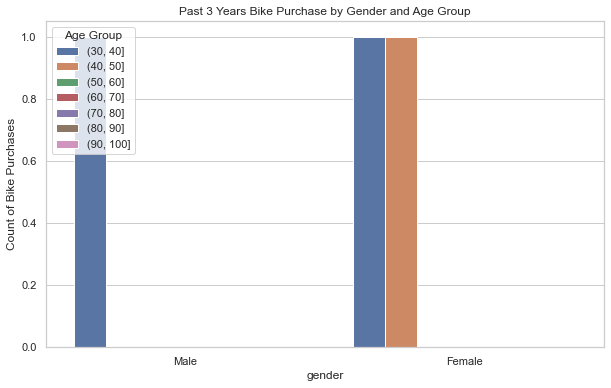

In [25]:
#Past 3 years bike-related purchases
import seaborn as sns

# Create a bar chart categorized by gender and age
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Group the data by gender and age, and count the bike purchases
age_bins = [30, 40, 50, 60, 70, 80, 90, 100]
CustomerDemographic_df['Age Group'] = pd.cut(CustomerDemographic_df['Age'], bins=age_bins)

# Create the bar chart
sns.barplot(x='gender', y='past_3_years_bike_related_purchases', hue='Age Group', data=CustomerDemographic_df)

# Customize the plot
plt.xlabel('gender')
plt.ylabel('Count of Bike Purchases')
plt.title('Past 3 Years Bike Purchase by Gender and Age Group')

# Show the plot
plt.show()
